<b style="color:Green;font-size:32px;">Sparks Foundation - Data Science & Analytics Internship!</b><br>
<b style="color:#ff3333;font-size:19px;">#Task_4 - Stock Market Prediction using
Numerical and Textual Analysis
(Level - Advanced)!</b><br>
<b style="font-size:17px;">Description of the task_4:-</b><br>
<ul style="font-size:15px;line-height:18px;"><b><li>Create a hybrid model for stock price/performance prediction using
numerical analysis of historical stock prices, and sentimental analysis
of news headlines.</li>
<li>Stock to analyze and predict - SENSEX (S&P BSE SENSEX)</li>
    <li>Download historical stock prices from finance- <a>  finance.yahoo.com</a></li>
    <li>Download textual (news) data from - <a>https://bit.ly/36fFPI6</a></li></b>
<li><b> Github Link <a>https://github.com/UMMEATHIYA/Student-Percentage-Prediction_Sparks-Foundations</a></li></b>
</ul>

<b style="color:DarkGreen;font-size:20px;">Importing the Libraries!</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler

<b style="color:DarkGreen;font-size:20px;">Reading the data from .CSV File!</b>

In [2]:
df = pd.read_csv('india-news-headlines.csv')
df.head()

publish_date headline_category  \
0      20010101        sports.wwe   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  
0  win over cena satisfying but defeating underta...  
1  Status quo will not be disturbed at Ayodhya; s...  
2                Fissures in Hurriyat over Pak visit  
3              America's unwanted heading for India?  
4                 For bigwigs; it is destination Goa

<b style="color:DarkGreen;font-size:20px;">Checking for Null values or Missing values!</b>

In [3]:
df.isnull().any

<bound method DataFrame.any of          publish_date  headline_category  headline_text
0               False              False          False
1               False              False          False
2               False              False          False
3               False              False          False
4               False              False          False
...               ...                ...            ...
3297167         False              False          False
3297168         False              False          False
3297169         False              False          False
3297170         False              False          False
3297171         False              False          False

[3297172 rows x 3 columns]>

<b style="color:DarkGreen;font-size:20px;">info()</b><br>
This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [5]:
df['publish_date']=pd.to_datetime(df['publish_date'].astype(str), format='%Y/%m/%d')

In [6]:
df.head()

publish_date headline_category  \
0   2001-01-01        sports.wwe   
1   2001-01-02           unknown   
2   2001-01-02           unknown   
3   2001-01-02           unknown   
4   2001-01-02           unknown   

                                       headline_text  
0  win over cena satisfying but defeating underta...  
1  Status quo will not be disturbed at Ayodhya; s...  
2                Fissures in Hurriyat over Pak visit  
3              America's unwanted heading for India?  
4                 For bigwigs; it is destination Goa

<b style="color:DarkGreen;font-size:20px;">DataFrame Columns</b><br>
<li>Embedding only the required columns i.e publish_date and headline_text</li>

In [7]:
df = df[['publish_date', 'headline_text']]

In [8]:
df.head()

publish_date                                      headline_text
0   2001-01-01  win over cena satisfying but defeating underta...
1   2001-01-02  Status quo will not be disturbed at Ayodhya; s...
2   2001-01-02                Fissures in Hurriyat over Pak visit
3   2001-01-02              America's unwanted heading for India?
4   2001-01-02                 For bigwigs; it is destination Goa

<b style="color:DarkGreen;font-size:20px;">Creating a Dictionary</b><br>

In [9]:
dic_df = {}
temp = df.loc[0, 'publish_date']
temp2 = str(df.loc[0, 'headline_text'])
for x in range(1, len(df)):
    if df.loc[x, 'publish_date']==temp:
        temp2 += '. ' + str(df.loc[x, 'headline_text'])
    else:
        dic_df[df.loc[x-1, 'publish_date']] = temp2
        temp2 = ""
        temp = df.loc[x, 'publish_date']

In [10]:
len(dic_df)

7079

In [11]:
indexes = np.arange(0, len(dic_df))
df = pd.DataFrame(indexes)
df.head()

0
0  0
1  1
2  2
3  3
4  4

In [12]:
df['Publish_Date'] = dic_df.keys()
l = []
for i in dic_df.keys():
    l.append(dic_df[i])

In [13]:
l[2]

". Think again; Laxman tells Sangh Parivar. Hurriyat undecided over team to Pakistan. Vajpayee wants to put reforms on fast track. Stephen Hawking keeps date with Mumbai. Anti-Hrithik or anti-hopelessness. Govt plans stadium near Panaji. BJP doing a volte face on casinos: Cong. 3 watershed projects on the anvil. No report yet on fire in Udyog Bhavan. He is the king of 'five star' industry. Petrol pump sealed for selling adulterated fuel. Milk price up by Rs 1 per litre. Congress House is no-smoking zone. Rural weightage: Govt reassures Governor. Bride gets honeymoon surprise: Chopper ride. Is hangover a sign of alcoholicism?. Almatti: AP to wait and watch. 10-year-old girl missing. Hear his messages from the heart. Dance like no one's watching. From reel love to real love. Power row: Bribe attempt charge denied. Lakshamma's cry for help heard. It's shopping time for your newborn. Con games on the catwalk. They are here to help us. These noisy spots are hurting your ears. Flat tyres; fl

In [14]:
df['headline_category'] = np.array(l)

In [15]:
df = df.drop(0, axis=1)

In [16]:
df.head()

Publish_Date                                  headline_category
0   2001-01-01  win over cena satisfying but defeating underta...
1   2001-01-02  . Fissures in Hurriyat over Pak visit. America...
2   2001-01-03  . Think again; Laxman tells Sangh Parivar. Hur...
3   2001-01-04  . Vajpayee gives big push to tech education; R...
4   2001-01-05  . Hawkings' day out. Light combat craft takes ...

<b style="color:DarkGreen;font-size:20px;">TextBlob, Polarity, Subjectivity</b><br>
<li><b style="color:darkgreen;font-size:15px;">TextBlob</b> is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.</li>
<li><b style="color:darkgreen;font-size:15px;">Polarity</b> is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. </li><li><b style="color:darkgreen;font-size:15px;">Subjective</b> sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].</li>

In [17]:
polarity = []
subjectivity = []
tuples = []
for i in df['headline_category'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [18]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [19]:
df['Polarity'] = np.array(polarity)
df['Subjectivity'] = np.array(subjectivity)

In [20]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df)):
    pol = df.iloc[i]['Polarity']
    sub = df.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [21]:
df['Sentiment'] = polarity
df['Opinion'] = subjectivity

In [22]:
df.head()

Publish_Date                                  headline_category  Polarity  \
0   2001-01-01  win over cena satisfying but defeating underta...  0.433333   
1   2001-01-02  . Fissures in Hurriyat over Pak visit. America...  0.151333   
2   2001-01-03  . Think again; Laxman tells Sangh Parivar. Hur...  0.163636   
3   2001-01-04  . Vajpayee gives big push to tech education; R...  0.087961   
4   2001-01-05  . Hawkings' day out. Light combat craft takes ...  0.260401   

   Subjectivity Sentiment  Opinion  
0      0.633333  Positive   Public  
1      0.282333   Neutral  Factual  
2      0.363636   Neutral  Factual  
3      0.446847   Neutral   Public  
4      0.473984  Positive   Public

<b style="color:DarkGreen;font-size:20px;">Pie Plot</b><br>
<li>A Pie Chart can only display one series of data. Pie charts show the size of items (called wedge) in one data series, proportional to the sum of the items. </li>
<li>The data points in a pie chart are shown as a percentage of the whole pie.</li>

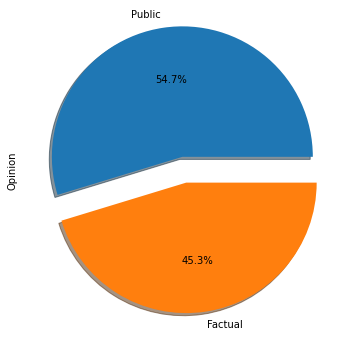

In [23]:
df['Opinion'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(8,6))

<b style="color:DarkGreen;font-size:20px;">Pair Plot-Seaborn</b><br>
<li>To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.</li> <li>This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.</li>

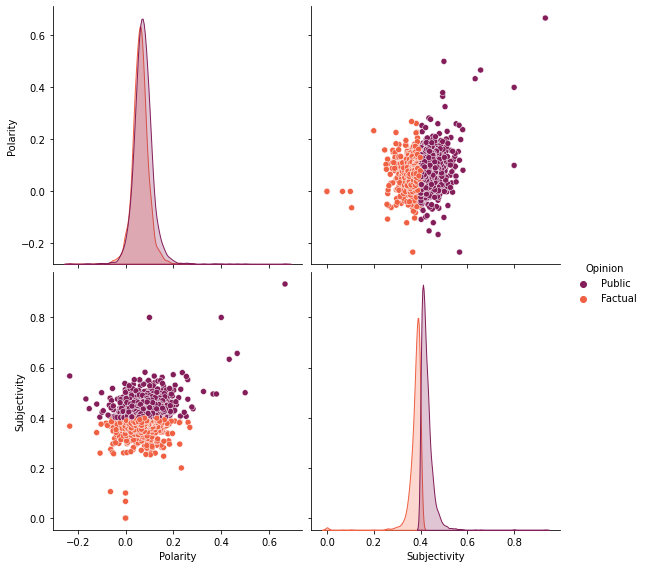

In [24]:
sns.pairplot(df, hue='Opinion',palette="rocket",height=4)

C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


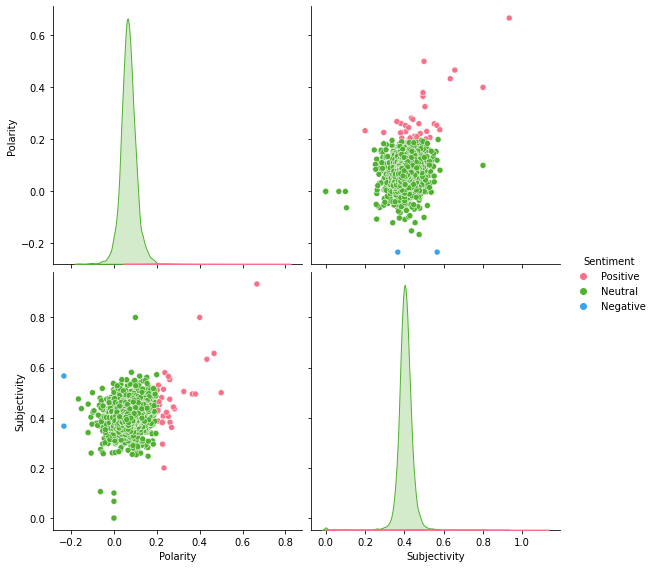

In [25]:
sns.pairplot(df, hue='Sentiment',palette="husl",height=4)

In [26]:
df['Opinion'].value_counts()

Public     3873
Factual    3206
Name: Opinion, dtype: int64

In [27]:
df['Sentiment'].value_counts()

Neutral     7044
Positive      33
Negative       2
Name: Sentiment, dtype: int64

<b style="color:DarkGreen;font-size:20px;">Correlation</b><br>
<li>Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.</li><br><br>
<b style="color:DarkGreen;font-size:20px;">HeatMap</b><br>
<li>A heat map (or heatmap) is a graphical representation of data where values are depicted by color. Heat maps make it easy to visualize complex data.</li>

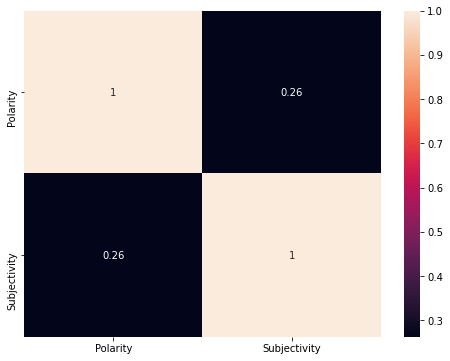

In [28]:
corre=df.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#plt.show()
sns.heatmap(data=corre,annot=True)

<b style="color:DarkGreen;font-size:20px;">NLTK Library</b><br>
<li>NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.</li><br>
<b style="color:DarkGreen;font-size:20px;">WordCloud</b>
<li>A Wordcloud (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms.</li><br>
<b style="color:DarkGreen;font-size:20px;">Stop Words</b><br>
<li>Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. </li><br>
<b style="color:DarkGreen;font-size:20px;">Tokenization</b><br>
<li>In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.</li><br>
<b style="color:DarkGreen;font-size:20px;">Lemmmatization</b><br>
<li>Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.</li>

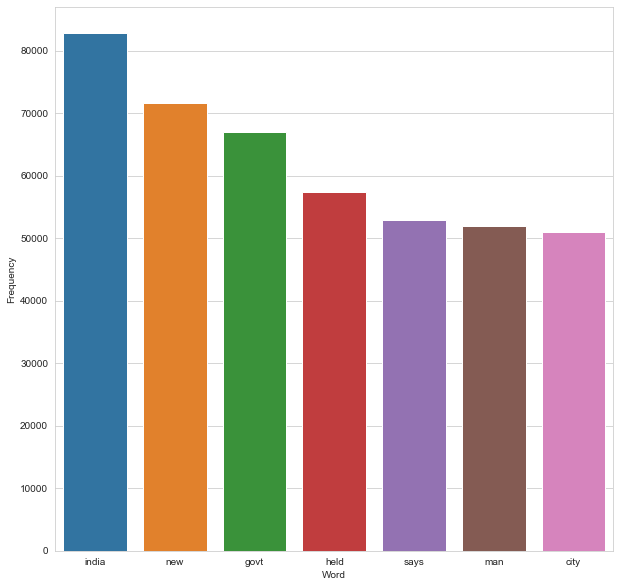

In [29]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['headline_category'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

<b style="color:DarkGreen;font-size:25px;">Stock Market Prediction using Numerical & Textual Analysis</b><br>


<b style="color:DarkGreen;font-size:20px;">Importing the Libraries!</b>

In [17]:
import numpy as np
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<b style="color:DarkGreen;font-size:20px;">Reading the data from .CSV File!</b>

In [19]:
df = pd.read_csv('aia.us.txt')
df.head()

Date    Open    High     Low   Close  Volume  OpenInt
0  2007-11-16  42.433  43.094  42.195  43.051   59324        0
1  2007-11-19  44.357  44.357  40.551  40.741   17901        0
2  2007-11-20  42.187  42.232  40.907  41.927    8606        0
3  2007-11-21  41.046  41.046  39.746  40.069    1950        0
4  2007-11-26  41.282  41.612  40.594  40.594    8492        0

<b style="color:DarkGreen;font-size:20px;">shape()</b><br>The shape attribute of pandas. DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) .

In [21]:
df.shape

(2513, 7)

<b style="color:DarkGreen;font-size:20px;">describe()</b><br>Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 

In [22]:
df.describe()

Open         High          Low        Close        Volume  \
count  2513.000000  2513.000000  2513.000000  2513.000000  2.513000e+03   
mean     40.506031    40.700737    40.243670    40.473974  3.853709e+04   
std       8.094683     8.037905     8.175736     8.113613  8.050519e+04   
min      17.335000    18.501000    17.201000    17.429000  1.031000e+03   
25%      36.008000    36.176000    35.647000    36.000000  1.449100e+04   
50%      40.749000    40.907000    40.524000    40.661000  2.533900e+04   
75%      44.363000    44.474000    44.207000    44.339000  4.307300e+04   
max      66.040000    66.180000    65.930000    66.150000  2.845169e+06   

       OpenInt  
count   2513.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

<b style="color:DarkGreen;font-size:20px;">info()</b><br>
This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2513 non-null   object 
 1   Open     2513 non-null   float64
 2   High     2513 non-null   float64
 3   Low      2513 non-null   float64
 4   Close    2513 non-null   float64
 5   Volume   2513 non-null   int64  
 6   OpenInt  2513 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 137.6+ KB


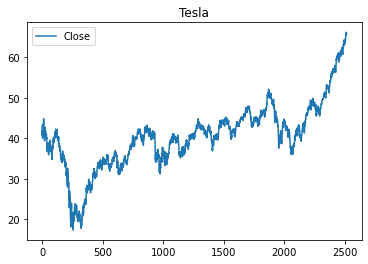

In [24]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

<b style="color:DarkGreen;font-size:20px;">cumsum()</b><br>
The cumsum() function is used to get cumulative sum over a DataFrame or Series axis.

Returns a DataFrame or Series of the same size containing the cumulative sum.

Text(0.5, 1.0, 'Tesla Cumulative Returns')

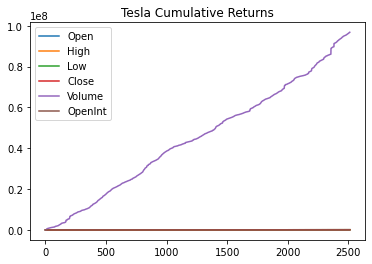

In [25]:
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

<b style="color:DarkGreen;font-size:20px;">Lag Plot</b><br>
A lag plot is a scatter plot for a time series and the same data lagged. With such a plot, we can check whether there is a possible correlation between CPU transistor counts this year and the previous year, for instance. The lag_plot() pandas function in pandas.tools.plotting can draw a lag plot.

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

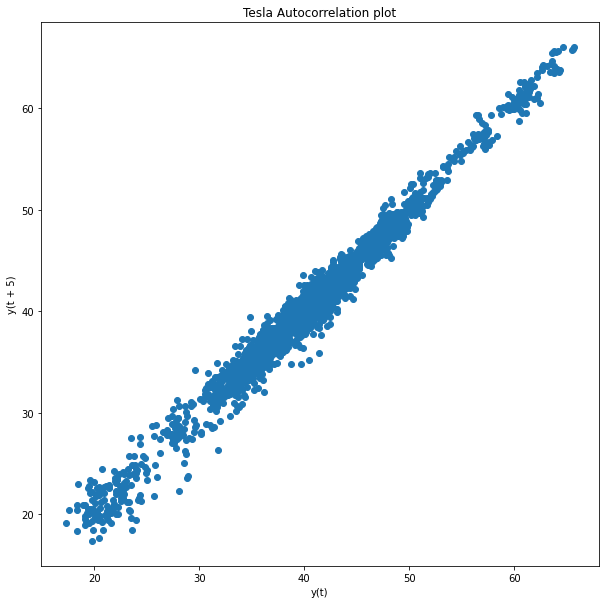

In [26]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

In [27]:
df['Date'][1857]

'2015-04-09'

<b style="color:Maroon;font-size:25px;">Forecating Models</b><br><br>
<b style="color:DarkGreen;font-size:20px;">Arima Model</b><br>
<li>ARIMA, short for 'Auto Regressive Integrated Moving Average' is actually a class of models that 'explains' a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.</li>

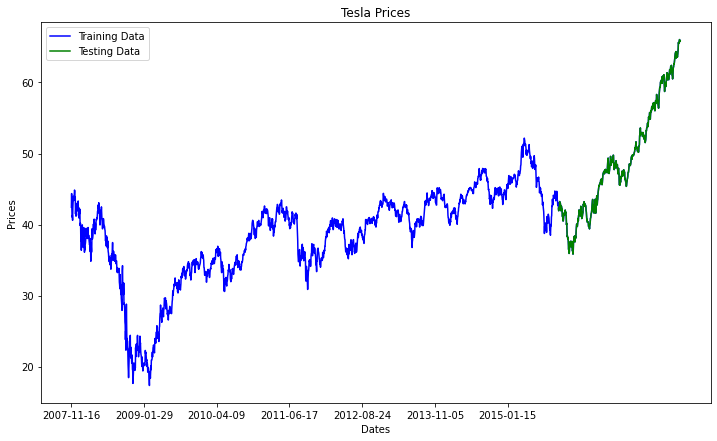

In [28]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [29]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [30]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.211
Symmetric mean absolute percentage error: 17.704


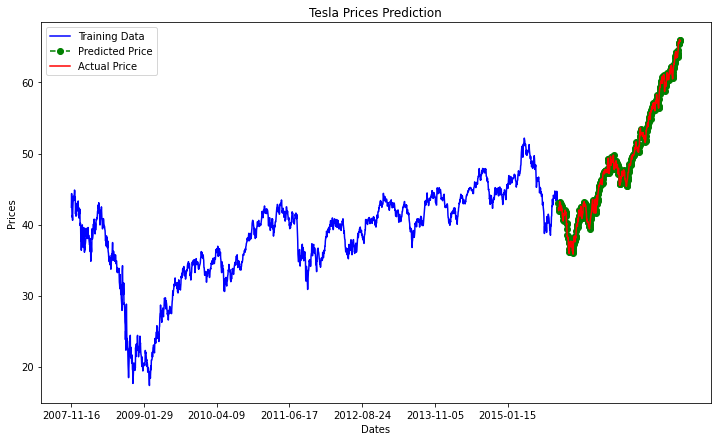

In [33]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2357:300])
plt.legend()

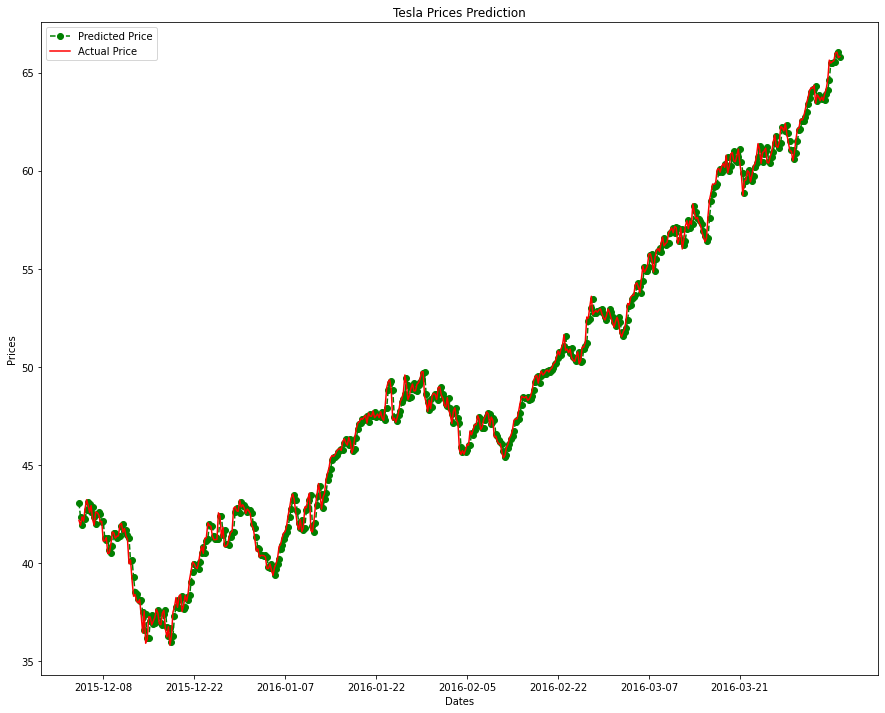

In [38]:
plt.figure(figsize=(15,12))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(2026,2506, 60), df['Date'][2026:2506:10])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [68]:
df3 = df['Close']
df3.tail()

Date
2017-11-06    65.70
2017-11-07    65.83
2017-11-08    66.15
2017-11-09    65.68
2017-11-10    65.78
Name: Close, dtype: float64

In [69]:
df3 = pd.DataFrame(df3)  

In [72]:
# Prediction 100 days into the future.
future_days = 100
df3['Prediction'] = df3['Close'].shift(-future_days)
df3.tail()

Close  Prediction
Date                         
2017-11-06  65.70         NaN
2017-11-07  65.83         NaN
2017-11-08  66.15         NaN
2017-11-09  65.68         NaN
2017-11-10  65.78         NaN

In [73]:
X = np.array(df3.drop(['Prediction'], 1))[:-future_days]
print(X)

[[43.051]
 [40.741]
 [41.927]
 ...
 [57.249]
 [57.03 ]
 [56.95 ]]


<b style="color:DarkGreen;font-size:20px;">Prediction from Arima Model</b><br>

In [74]:
y = np.array(df3['Prediction'])[:-future_days]
print(y)

[39.303 40.462 39.888 ... 66.15  65.68  65.78 ]


<b style="color:DarkGreen;font-size:20px;">Decision Tree & Linear Regression Machine Learning Algorithms</b><br>

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<b style="color:DarkGreen;font-size:20px;">Fitting the data into the Model</b><br>

In [77]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

<b style="color:DarkGreen;font-size:20px;">Future Predicted dayes using ML Algorithm</b><br>

In [79]:
x_future = df3.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[49.415],
       [49.645],
       [49.684],
       [49.645],
       [49.804],
       [49.854],
       [49.595],
       [49.774],
       [49.884],
       [50.063],
       [50.263],
       [50.193],
       [50.811],
       [50.751],
       [50.731],
       [51.229],
       [51.349],
       [51.379],
       [50.98 ],
       [50.761],
       [50.641],
       [51.   ],
       [50.281],
       [50.353],
       [50.342],
       [50.477],
       [50.452],
       [49.961],
       [50.53 ],
       [51.09 ],
       [50.97 ],
       [52.027],
       [52.41 ],
       [52.475],
       [53.213],
       [52.771],
       [53.043],
       [52.815],
       [52.844],
       [52.924],
       [53.063],
       [53.003],
       [52.821],
       [52.336],
       [52.934],
       [52.824],
       [52.844],
       [52.602],
       [52.425],
       [52.226],
       [51.897],
       [52.236],
       [52.276],
       [52.415],
       [51.558],
       [51.189],
       [51.887],
       [51.997],
       [52.405

In [80]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[57.3793 57.485  58.01   57.485  57.65   57.1    57.17   57.15   56.895
 56.26   43.149  56.98   38.731  58.74   59.01   59.58   59.22   59.52
 60.01   59.98   60.01   60.28   43.149  43.073  60.38   43.187  60.2
 60.7    60.69   42.96   60.01   60.79   61.17   60.32   58.84   58.78
 59.57   59.4    60.555  59.27   59.57   59.7    60.43   60.55   60.8
 61.21   60.555  60.32   60.8    61.03   61.13   60.25   60.55   60.8
 40.311  61.73   61.13   40.921  61.17   61.65   61.65   62.22   62.
 60.89   61.81   61.04   60.89   61.04   60.69   61.37   61.66   62.42
 62.346  63.615  62.79   62.7    63.29   63.74   63.79   63.615  64.17
 63.48   64.35   63.57   63.615  63.48   63.4547 63.43   63.29   64.42
 65.68   64.68   65.48   65.5659 65.4    65.7    63.48   66.15   65.68
 63.43  ]


In [81]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[49.23563952 49.43961401 49.47420099 49.43961401 49.58062246 49.62496474
 49.39527173 49.55401709 49.6515701  49.81031546 49.98768458 49.92560539
 50.47367597 50.42046523 50.40272832 50.84437742 50.9507989  50.97740426
 50.62355287 50.42933369 50.32291222 50.64128978 50.0036478  50.06750069
 50.05774538 50.17746954 50.1552984  49.71985721 50.22447236 50.72110589
 50.61468442 51.55208021 51.89174207 51.94938703 52.60387908 52.21189333
 52.45311533 52.25091453 52.27663305 52.3475807  52.47085224 52.4176415
 52.25623561 51.82611549 52.35644916 52.25889614 52.27663305 52.06201642
 51.90504475 51.72856248 51.43679028 51.73743094 51.77290476 51.8961763
 51.13614962 50.8089036  51.42792182 51.52547484 51.88730784 52.57727371
 52.5595368  52.78922981 52.92225665 53.10760737 53.57586185 53.42598494
 53.20427354 53.39937957 53.71775714 54.13280088 54.0884586  54.33588852
 54.57444998 55.06930982 54.87509064 54.21261698 54.40683617 54.80414299
 55.20233666 55.06930982 55.07817828 55.55618805 55.6

In [82]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<b style="color:DarkGreen;font-size:20px;">Accuracy of Linear Regression</b><br>

In [85]:
print("Accuracy of Training LR -",lr.score(x_train, y_train)*100)
print("Accuracy of Testing LR - ",lr.score(x_test, y_test)*100)

Accuracy of Training LR - 57.489933289083005
Accuracy of Testing LR -  58.24810327672003


<b style="color:DarkGreen;font-size:20px;">Accuracy of Decision Tree</b><br>

In [93]:
print("Accuracy of Decision Tree -",tree.score(x_train, y_train)*100)


Accuracy of Decision Tree - 96.43535235960302


<b style="color:DarkGreen;font-size:25px;">Stock Market Prediction & Comparison of IBM VS Google data</b><br>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data1 = pd.read_csv('IBM_data.csv')
data2 = pd.read_csv('GOOGL_data.csv')

In [13]:
data1.head() #IBM Data

date    open     high     low   close   volume Name
0  2013-02-08  199.97  202.090  199.68  201.68  2893254  IBM
1  2013-02-11  200.98  201.950  199.75  200.16  2944651  IBM
2  2013-02-12  200.01  200.735  199.02  200.04  2461779  IBM
3  2013-02-13  200.65  200.950  199.57  200.09  2169757  IBM
4  2013-02-14  199.73  200.320  199.26  199.65  3294126  IBM

In [14]:
data2.head()#Google Data

date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1  2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2  2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3  2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4  2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL

In [15]:
print('IBM Data-',data1.shape)
print('Google Data-',data2.shape)


IBM Data- (1259, 7)
Google Data- (1259, 7)


In [16]:
print('IBM Data-',data1.describe())
print('\n\n')
print('Google Data-',data2.describe())

IBM Data-               open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    167.230871   168.362928   166.156247   167.261926  4.352535e+06
std      20.184908    20.257137    20.157675    20.207108  2.346671e+06
min     118.460000   119.660000   116.901000   117.850000  1.193025e+06
25%     152.400000   153.318950   151.594600   152.435000  3.067106e+06
50%     162.650000   163.905000   161.750000   162.670000  3.804943e+06
75%     184.555000   185.730000   183.535000   184.365000  4.828166e+06
max     215.380000   215.900000   214.300000   215.800000  3.049019e+07



Google Data-               open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    682.357041   687.362776   676.691790   682.233847  2.457501e+06
std     187.409986   188.531563   186.265742   187.573892  1.591432e+06
min     384.964600   390.164800   381.

In [17]:
print('IBM Data-',data1.info())
print('\n\n')
print('Google Data-',data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB
IBM Data- None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
m

In [18]:
data1['date']=pd.to_datetime(data1['date'])
data2['date']=pd.to_datetime(data2['date'])

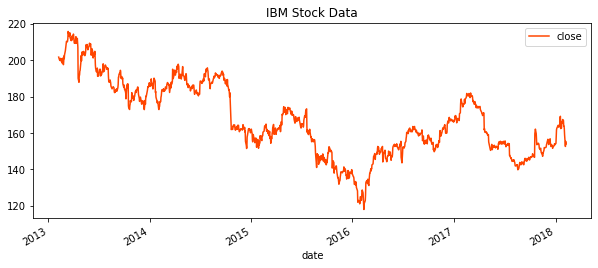

In [19]:
data1.plot(x='date', y='close',legend=True,figsize=(10,4),color='orangered')
plt.title('IBM Stock Data')
plt.ioff()

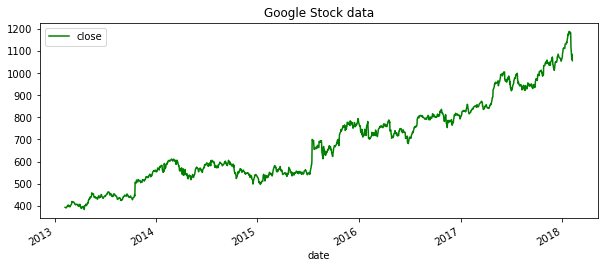

In [20]:
data2.plot(x='date', y='close',legend=True,figsize=(10,4),color='green')
plt.title('Google Stock data')
plt.ioff()

<b style="color:DarkGreen;font-size:20px;">Displot Plot</b><br>
Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.<br>
A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.

C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


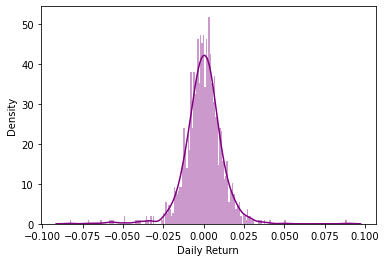

In [21]:
data1['Daily Return']=data1['close'].pct_change()
sns.distplot(data1['Daily Return'].dropna(),bins=200,color='purple')
plt.ioff()

<b style="color:DarkGreen;font-size:20px;">FB Prophet Model</b><br>
<li>Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.</li>


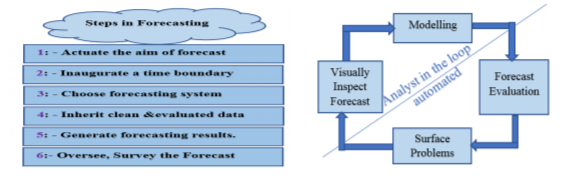

In [23]:
#Forecasting of IBM Stock Data Using FB Prophet Model
fb_ph=data1[['date','close']]
fb_ph=fb_ph.sort_values('date')
fb_ph

date   close
0    2013-02-08  201.68
1    2013-02-11  200.16
2    2013-02-12  200.04
3    2013-02-13  200.09
4    2013-02-14  199.65
...         ...     ...
1254 2018-02-01  162.40
1255 2018-02-02  159.03
1256 2018-02-05  152.53
1257 2018-02-06  155.34
1258 2018-02-07  153.85

[1259 rows x 2 columns]

In [24]:
fb_ph=fb_ph.rename(columns={'date':'ds','close':'y'})
fb_ph

ds       y
0    2013-02-08  201.68
1    2013-02-11  200.16
2    2013-02-12  200.04
3    2013-02-13  200.09
4    2013-02-14  199.65
...         ...     ...
1254 2018-02-01  162.40
1255 2018-02-02  159.03
1256 2018-02-05  152.53
1257 2018-02-06  155.34
1258 2018-02-07  153.85

[1259 rows x 2 columns]

In [25]:
import random 
import seaborn as sns
from fbprophet import Prophet

In [26]:
m=Prophet()
m.fit(fb_ph)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2013-02-08  195.576215  194.472882  206.258643   195.576215   195.576215   
1    2013-02-11  195.771889  195.676167  207.181268   195.771889   195.771889   
2    2013-02-12  195.837114  195.261671  207.507226   195.837114   195.837114   
3    2013-02-13  195.902339  195.805338  207.419957   195.902339   195.902339   
4    2013-02-14  195.967564  196.095182  208.296064   195.967564   195.967564   
...         ...         ...         ...         ...          ...          ...   
1619 2019-02-03  142.365170   68.273409  234.671001    60.930296   230.307077   
1620 2019-02-04  142.337090   62.916420  234.546313    60.606868   230.866251   
1621 2019-02-05  142.309011   63.772662  236.151133    60.161055   231.262058   
1622 2019-02-06  142.280931   66.041421  236.002637    59.758457   231.595495   
1623 2019-02-07  142.252851   63.988374  236.301945    59.390758   231.928932   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           4.484160              4.484160              4.484160 -0.682483   
1           5.460325              5.460325              5.460325 -0.529695   
2           5.616583              5.616583              5.616583 -0.681314   
3           5.956329              5.956329              5.956329 -0.659110   
4           6.473512              6.473512              6.473512 -0.464788   
...              ...                   ...                   ...       ...   
1619        5.813779              5.813779              5.813779  1.508695   
1620        3.855303              3.855303              3.855303 -0.529695   
1621        3.819666              3.819666              3.819666 -0.681314   
1622        3.992608              3.992608              3.992608 -0.659110   
1623        4.370505              4.370505              4.370505 -0.464788   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0        -0.682483     -0.682483  5.166643      5.166643      5.166643   
1        -0.529695     -0.529695  5.990020      5.990020      5.990020   
2        -0.681314     -0.681314  6.297897      6.297897      6.297897   
3        -0.659110     -0.659110  6.615439      6.615439      6.615439   
4        -0.464788     -0.464788  6.938301      6.938301      6.938301   
...            ...           ...       ...           ...           ...   
1619      1.508695      1.508695  4.305083      4.305083      4.305083   
1620     -0.529695     -0.529695  4.384998      4.384998      4.384998   
1621     -0.681314     -0.681314  4.500980      4.500980      4.500980   
1622     -0.659110     -0.659110  4.651719      4.651719      4.651719   
1623     -0.464788     -0.464788  4.835293      4.835293      4.835293   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1619                   0.0                         0.0   
1620                   0.0                         0.0   
1621                   0.0                         0.0   
1622                   0.0                         0.0   
1623                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0  200.060375  
1                            0.0  201.232214  
2                            0.0  201.453697  
3                            0.0  201.858667  
4                            0.0  202.441076  
...                          ...         ...  
1619                         0.0  148.178949  
1620                         0.0  146.192394  
1621                         0.0  146.128677  
1622                         0.0  146.273539  


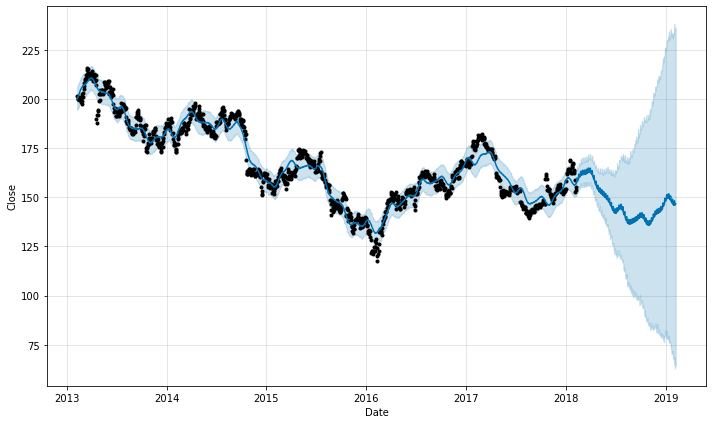

In [27]:
figure=m.plot(forecast,xlabel='Date',ylabel='Close')

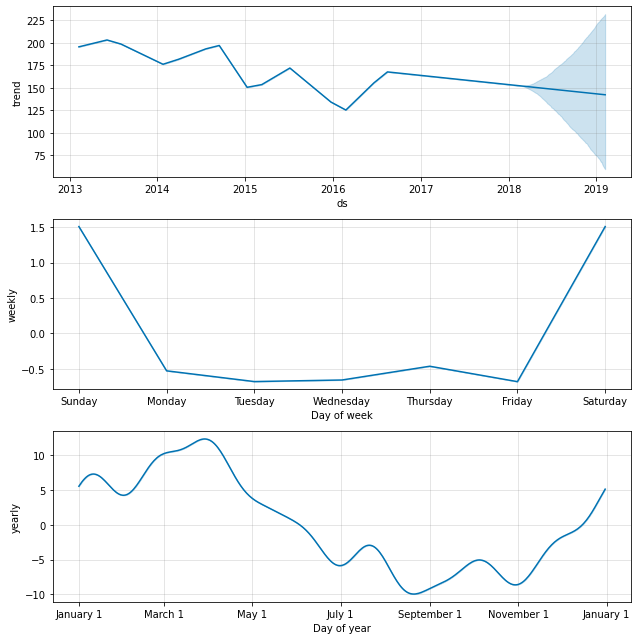

In [28]:
figure=m.plot_components(forecast)

In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower  yhat_upper
1619 2019-02-03  148.178949   64.721758  238.304829
1620 2019-02-04  146.192394   63.596206  235.403655
1621 2019-02-05  146.128677   63.580501  235.363648
1622 2019-02-06  146.273539   63.699079  237.382054
1623 2019-02-07  146.623356   61.650767  236.510373

In [30]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs.scatter.marker import Line
from plotly.graph_objs import Line
from fbprophet.plot import plot_plotly

In [31]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(
        title_text='<b>IBM Stock data Analysis & Forecasting<b>',
        title_x=0.5,
        paper_bgcolor='LightBlue',
        plot_bgcolor = "LightBlue",)
fig.show()

<h1><b>Google Stock Data Analysis & Forecasting using FB Prophet Model</b></h1>

In [32]:
fb_ph2=data2[['date','close']]
fb_ph2=fb_ph2.sort_values('date')
fb_ph2

date      close
0    2013-02-08   393.0777
1    2013-02-11   391.6012
2    2013-02-12   390.7403
3    2013-02-13   391.8214
4    2013-02-14   394.3039
...         ...        ...
1254 2018-02-01  1181.5900
1255 2018-02-02  1119.2000
1256 2018-02-05  1062.3900
1257 2018-02-06  1084.4300
1258 2018-02-07  1055.4100

[1259 rows x 2 columns]

In [33]:
fb_ph2=fb_ph2.rename(columns={'date':'ds','close':'y'})
fb_ph2

ds          y
0    2013-02-08   393.0777
1    2013-02-11   391.6012
2    2013-02-12   390.7403
3    2013-02-13   391.8214
4    2013-02-14   394.3039
...         ...        ...
1254 2018-02-01  1181.5900
1255 2018-02-02  1119.2000
1256 2018-02-05  1062.3900
1257 2018-02-06  1084.4300
1258 2018-02-07  1055.4100

[1259 rows x 2 columns]

In [34]:
m=Prophet()
m.fit(fb_ph2)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2013-02-08   387.963384   357.807317   423.312941   387.963384   
1    2013-02-11   389.052307   355.034369   421.102515   389.052307   
2    2013-02-12   389.415282   357.177542   422.372074   389.415282   
3    2013-02-13   389.778256   358.412215   424.118239   389.778256   
4    2013-02-14   390.141230   356.022920   422.641598   390.141230   
...         ...          ...          ...          ...          ...   
1619 2019-02-03  1375.303826  1225.044372  1541.363942  1223.174620   
1620 2019-02-04  1376.048026  1225.487622  1540.669649  1223.393014   
1621 2019-02-05  1376.792226  1227.587218  1550.261460  1223.619456   
1622 2019-02-06  1377.536426  1218.432173  1544.017750  1223.845897   
1623 2019-02-07  1378.280626  1224.503507  1539.719516  1224.072339   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      387.963384        1.503046              1.503046              1.503046   
1      389.052307       -0.040589             -0.040589             -0.040589   
2      389.415282        0.135998              0.135998              0.135998   
3      389.778256        0.644021              0.644021              0.644021   
4      390.141230       -0.024565             -0.024565             -0.024565   
...           ...             ...                   ...                   ...   
1619  1525.678280        8.381033              8.381033              8.381033   
1620  1527.128742        4.761355              4.761355              4.761355   
1621  1528.579205        4.175770              4.175770              4.175770   
1622  1530.029667        3.831292              3.831292              3.831292   
1623  1531.480130        2.237369              2.237369              2.237369   

        weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0    -0.674778     -0.674778     -0.674778  2.177825      2.177825   
1    -0.978139     -0.978139     -0.978139  0.937550      0.937550   
2    -0.654882     -0.654882     -0.654882  0.790880      0.790880   
3    -0.142546     -0.142546     -0.142546  0.786567      0.786567   
4    -0.950280     -0.950280     -0.950280  0.925715      0.925715   
...        ...           ...           ...       ...           ...   
1619  1.700312      1.700312      1.700312  6.680721      6.680721   
1620 -0.978139     -0.978139     -0.978139  5.739495      5.739495   
1621 -0.654882     -0.654882     -0.654882  4.830652      4.830652   
1622 -0.142546     -0.142546     -0.142546  3.973837      3.973837   
1623 -0.950280     -0.950280     -0.950280  3.187649      3.187649   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         2.177825                   0.0                         0.0   
1         0.937550                   0.0                         0.0   
2         0.790880                   0.0                         0.0   
3         0.786567                   0.0                         0.0   
4         0.925715                   0.0                         0.0   
...            ...                   ...                         ...   
1619      6.680721                   0.0                         0.0   
1620      5.739495                   0.0                         0.0   
1621      4.830652                   0.0                         0.0   
1622      3.973837                   0.0                         0.0   
1623      3.187649                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
0                            0.0   389.466431  
1                            0.0   389.011718  
2                            0.0   389.551279  
3                            0.0   390.422277  
4                            0.0   390.116665  
...                          ...          ...  
1619                         0.0  1383.684859  
1620                         0.0  1380.809381  
1621                         0.0  1380.967996  
1

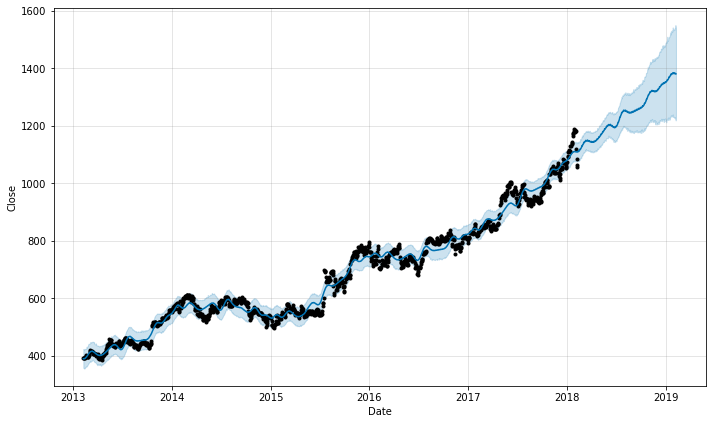

In [35]:
figure=m.plot(forecast,xlabel='Date',ylabel='Close')

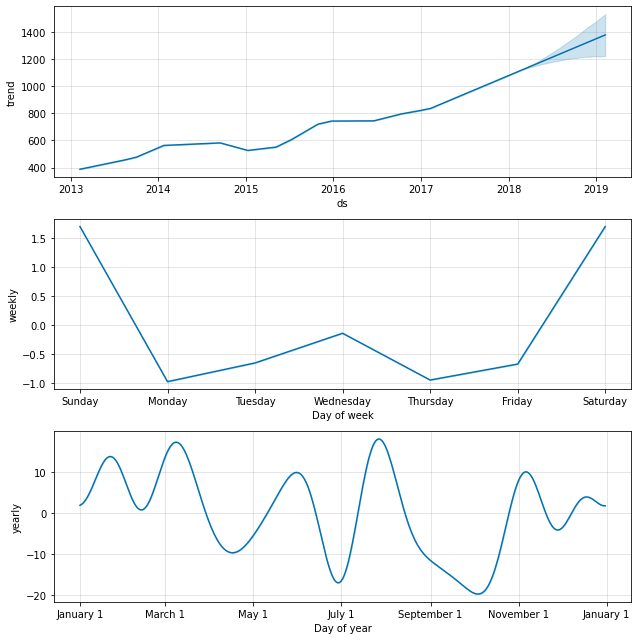

In [36]:
figure=m.plot_components(forecast)

In [37]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(
        title_text='<b style="color:white;">Google Stock data Analysis & Forecasting<b>',
        title_x=0.5,
        paper_bgcolor='DarkSalmon',
        plot_bgcolor = "DarkSalmon",)
fig.show()